   
<div style="background-image: linear-gradient(to left, rgb(255, 255, 255), rgb(138, 136, 136)); width: auto; margin: 10px;">
  <img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/fd/University_of_Tehran_logo.svg/225px-University_of_Tehran_logo.svg.png" width=100px width=auto style="padding:10px; vertical-align: center;">

</div>
   
<div   style:"text-align: center; background-image: linear-gradient(to left, rgb(255, 255, 255), rgb( 219, 204, 245  ));width: 400px; height: 30px; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">Course: Data Science </h1>

</div>
    <div   style:"border: 3px solid green;text-align: center; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">CA6-Introduction to Data Science</h1>
        <h1 style="font-family: Georgia; color: black; text-align: center; ">Team memebers:</h1>

</div>

<div>    
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Shahzad Momayez- 810100272 </h1>
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Mohammad Amanlou- 810100084 </h1>
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Amir Mahdi Farzaneh- 810100194 </h1>

</div>
   </html>

# Introduction
In this phase, we aim to analyze our dataset further and get a deeper understanding, so that
it can help us in the next phase. Analyzing the variables and their relationship would probably
help you a lot in achieving the insight you’ll need.

# what is EDA?
Exploratory Data Analysis (EDA) is a crucial step in the data analysis process where analysts use various techniques to understand and summarize the main characteristics of a dataset. EDA involves both graphical and quantitative methods to identify patterns, detect anomalies, test hypotheses, and check assumptions.$

In [419]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [420]:
df = pd.read_csv('hotels_in_europe.xls').drop(columns= ["Unnamed: 0.1" , "Unnamed: 0"])

In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   598 non-null    object 
 1   location               598 non-null    object 
 2   price                  598 non-null    object 
 3   rating                 598 non-null    float64
 4   quality                598 non-null    object 
 5   review                 598 non-null    object 
 6   bed                    598 non-null    object 
 7   distance from centure  598 non-null    float64
 8   room_type              598 non-null    object 
 9   nights                 598 non-null    object 
 10  adults                 598 non-null    object 
 11  city                   598 non-null    object 
 12  neighbourhood          598 non-null    object 
 13  quality_val            598 non-null    float64
 14  nights2                598 non-null    int64  
 15  adults

In [422]:
df.describe()

,rating,distance from centure,quality_val,nights2,adults2,review2,price2,bed2,dfc
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,8.319064,5.562375,2.270067,1.469900,1.511706,4831.324415,305.235786,1.221572,5.562375
std,0.548765,37.525590,0.748074,0.499511,0.500281,5276.075702,263.041015,0.701859,37.525590
min,4.900000,0.100000,1.000000,1.000000,1.000000,5.000000,20.000000,1.000000,0.100000
25%,8.100000,0.600000,2.000000,1.000000,1.000000,1229.000000,124.000000,1.000000,0.600000
50%,8.400000,1.500000,2.000000,1.000000,2.000000,2918.000000,217.000000,1.000000,1.500000
75%,8.700000,2.500000,3.000000,2.000000,2.000000,6924.500000,444.500000,1.000000,2.500000
max,9.600000,450.000000,4.000000,2.000000,2.000000,28926.000000,2777.000000,6.000000,450.000000


# preprocess

--------------------------------------------------------------------------------------------------------

.The given code snippet is a part of a data manipulation process using the Pandas library in Python. It focuses on extracting specific components from a string column in a DataFrame and creating new columns based on these components. this "location" coulumn containd 2 different information about the neighborhood and the city. so we replace "location" with 2 different columns:
1) neighborhood 
2) city

In [423]:
df['city'] = df['location'].str.split().str[-1]

In [424]:
df['neighbourhood'] = df['location'].str.split(',').str[0]

In [425]:
unique_values = df['quality'].unique()
print(unique_values)

['Fabulous' 'Very good' 'Good' 'Superb' 'Exceptional' 'Guest rating'
 'Review score']


In [426]:
sorted_df = df.sort_values(by='rating', ascending=True)

In [427]:
mapping = {'Review score' : 0, "Guest rating" : 0 ,'Good' : 1, 'Very good' : 2,'Fabulous' : 3, 'Superb' : 4 , 'Exceptional' : 5}
df['quality_val'] = df['quality'].map(mapping)

In [428]:
df['nights2'] = pd.to_numeric(df['nights'].str.split().str[0])
df['adults2'] = pd.to_numeric(df['adults'].str.split().str[0])

In [429]:
# df['bed2'] = pd.to_numeric(df['bed'].str.split().str[0])
df['review'] = df['review'].str.replace(',', '')
df['price'] = df['price'].str.replace(',', '')
df['review2'] = pd.to_numeric(df['review'].str.split().str[0])
df['price2'] = pd.to_numeric(df['price'].str.split("$").str[1])

In [430]:
df['bed2'] = pd.to_numeric(df['bed'].str.split().str[0], errors='coerce')

In [431]:
df['rating'] = pd.to_numeric(df['rating'])

In [432]:
df['dfc'] = pd.to_numeric(df['distance from centure'])

In [433]:
numerical_df = df.select_dtypes(include=[int, float])

In [434]:
def fill_nan(main_df):
    try:
      main_df_without_null = main_df.drop("size", axis=1)
      main_df_without_null = main_df_without_null.drop("free_canelation", axis=1)
    except:
      main_df_without_null = main_df

    main_df_without_null['bed2'].fillna(main_df_without_null['bed2'].median(), inplace=True)
    main_df_without_null['quality_val'].fillna(main_df_without_null['quality_val'].median(), inplace=True)
    main_df_without_null.head()
    main_df_without_null.isna().sum()
    return main_df_without_null

In [435]:
df = fill_nan(df)

C:\Users\User\AppData\Local\Temp\ipykernel_19052\70697506.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df_without_null['bed2'].fillna(main_df_without_null['bed2'].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_19052\70697506.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [436]:
df.isna().sum()

name                     0
location                 0
price                    0
rating                   0
quality                  0
review                   0
bed                      0
distance from centure    0
room_type                0
nights                   0
adults                   0
city                     0
neighbourhood            0
quality_val              0
nights2                  0
adults2                  0
review2                  0
price2                   0
bed2                     0
dfc                      0
dtype: int64

# Visualization

In [437]:
df.drop(columns = ["location" , "price" , "nights" , "adults" , "review" , "bed" , 'distance from centure' ,  ] , inplace = True)

In [438]:
df.columns = df.columns.str.replace('2$', '')
numerical_df = df.select_dtypes(include=[int, float])

In [439]:
df.describe()

,rating,quality_val,nights2,adults2,review2,price2,bed2,dfc
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,8.319064,2.225753,1.469900,1.511706,4831.324415,305.235786,1.153846,5.562375
std,0.548765,0.862899,0.499511,0.500281,5276.075702,263.041015,0.641718,37.525590
min,4.900000,0.000000,1.000000,1.000000,5.000000,20.000000,1.000000,0.100000
25%,8.100000,2.000000,1.000000,1.000000,1229.000000,124.000000,1.000000,0.600000
50%,8.400000,2.000000,1.000000,2.000000,2918.000000,217.000000,1.000000,1.500000
75%,8.700000,3.000000,2.000000,2.000000,6924.500000,444.500000,1.000000,2.500000
max,9.600000,5.000000,2.000000,2.000000,28926.000000,2777.000000,6.000000,450.000000


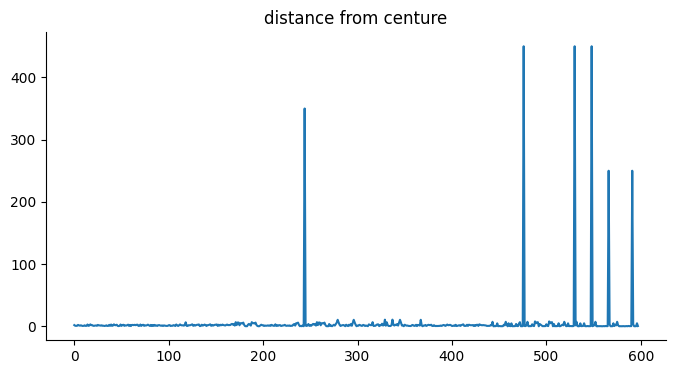

In [440]:
# @title distance from centure

numerical_df['dfc'].plot(kind='line', figsize=(8, 4), title='distance from centure')
plt.gca().spines[['top', 'right']].set_visible(False)

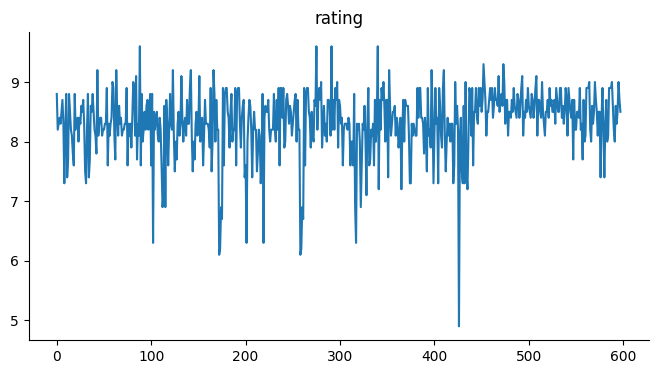

In [441]:
# @title rating

numerical_df['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

In [442]:
numerical_df.head()

,rating,quality_val,nights2,adults2,review2,price2,bed2,dfc
0,8.8,3,1,1,1209,183,1.0,2.0
1,8.2,2,1,1,10745,104,1.0,0.9
2,8.3,2,1,1,5619,97,1.0,0.8
3,8.4,2,1,1,4502,97,1.0,0.9
4,8.3,2,1,1,6989,101,1.0,2.3


KeyError: 'nights'

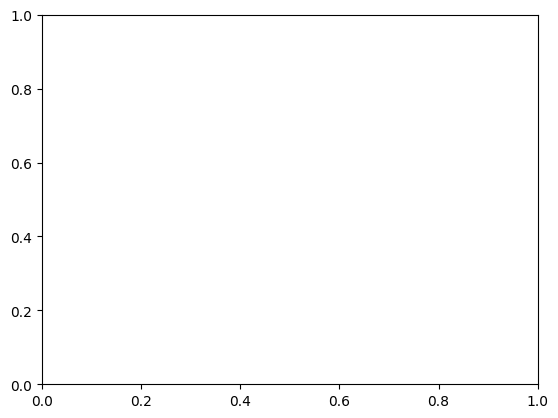

In [443]:
# @title quality_val vs nights2

numerical_df.plot(kind='scatter', x='quality_val', y='nights', s=32, alpha=.8)
plt.ylabel("nights")
plt.xlabel("quality")
plt.gca().spines[['top', 'right',]].set_visible(False)

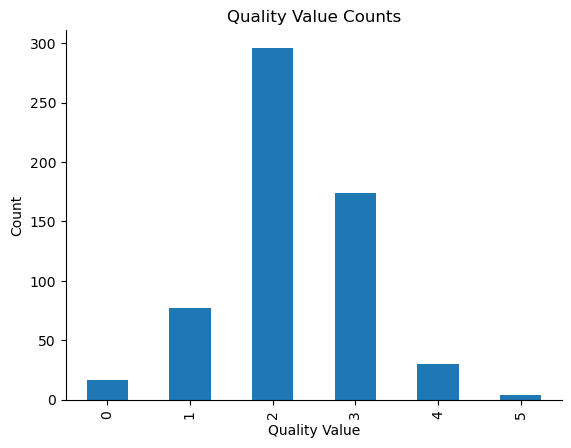

In [ ]:
# Calculate count of each unique value in 'quality_val' column
quality_val_counts = numerical_df['quality_val'].value_counts()

# Sort the quality_val_counts DataFrame by index (unique values of 'quality_val')
quality_val_counts = quality_val_counts.sort_index()
quality_val_counts.plot(kind='bar', title='Quality Value Counts')
plt.xlabel('Quality Value')
plt.ylabel('Count')
plt.gca().spines[['top', 'right']].set_visible(False)

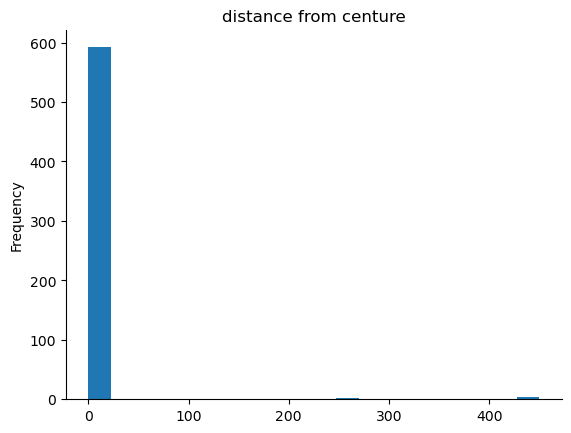

In [ ]:
# @title distance from centure

df['dfc'].plot(kind='hist', bins=20, title='distance from centure')
plt.gca().spines[['top', 'right',]].set_visible(False)

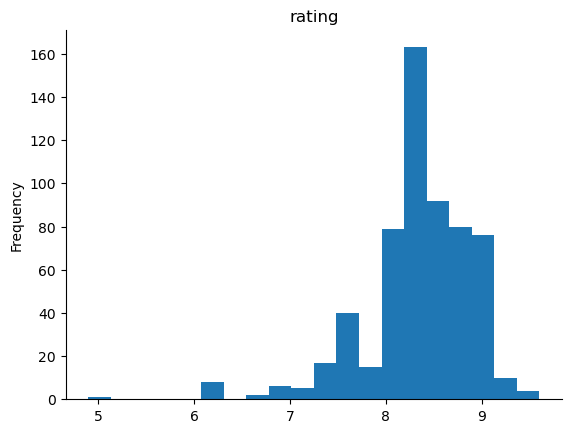

In [ ]:
# @title rating

df['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
correlation_matrix = numerical_df.corr()

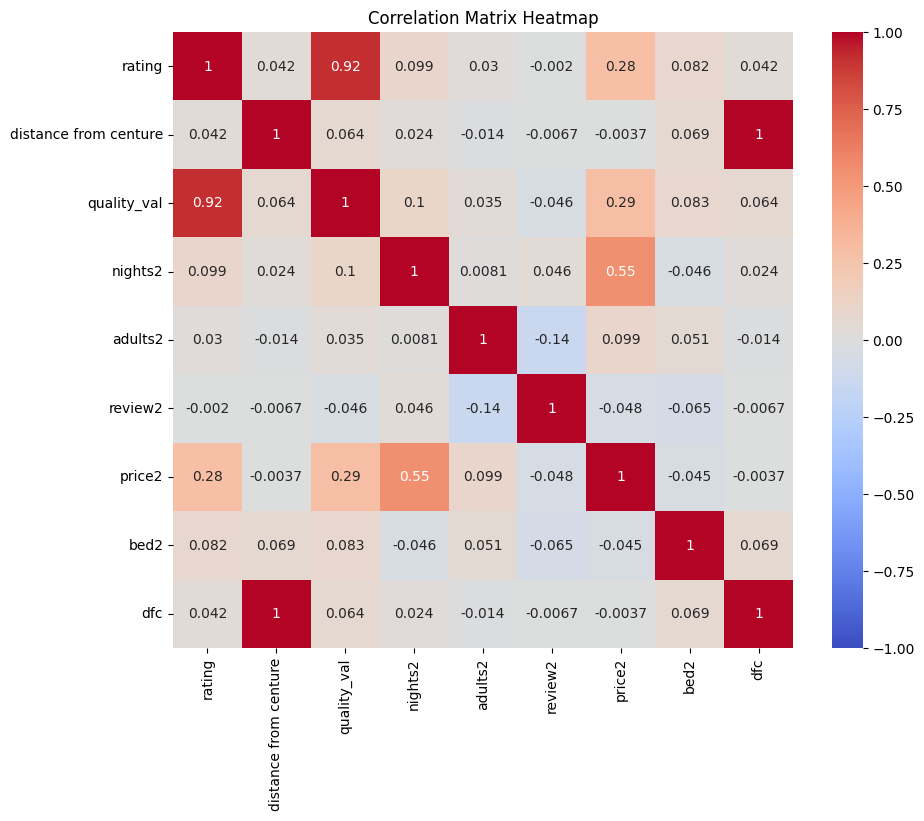

In [ ]:
# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add title and labels
plt.title('Correlation Matrix Heatmap')
plt.show()


In [445]:
main_df = df
df = df[df["nights2"] == 1]
df = df[df["adults2"] == 2]

In [453]:
df.head()

,name,rating,quality,room_type,city,neighbourhood,quality_val,nights2,adults2,review2,price2,bed2,dfc
123,Le Narcisse Blanc,9.2,Superb,Classic Double Room,Paris,7th arr.,4,1,2,577,647,1.0,1.9
124,Atala powered by Sonder,8.1,Very good,King Room,Paris,8th arr.,2,1,2,1251,164,1.0,2.5
125,Melia Paris Champs Elysées,7.5,Good,Junior Suite,Paris,16th arr.,1,1,2,357,574,1.0,3.2
126,Le Relais du Marais,8.0,Very good,Double or Twin Room,Paris,3rd arr.,2,1,2,1694,193,1.0,0.8
127,Hôtel Tilde,7.7,Good,Small Double Room,Paris,19th arr.,1,1,2,3302,110,1.0,2.3


In [463]:
# def city_rating_price(df):
#     plt.figure(figsize=(10, 10))
#     scatter_plot = sns.scatterplot(data=df, x='price', y='rating', hue='city', style='city', palette='deep', s=100)

#     # Add title and labels
#     plt.title('Price vs. Rating by City')
#     plt.xlabel('Price per $')
#     plt.ylabel('Rating')
#     plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.xticks(range(0, df['price2'].max() + 50, 50))
#     plt.xticks(rotation=90)
#     # Show plot
#     plt.show()
# city_rating_price(df)

In [462]:
# city_rating_price(df[df['price2'] < 1350])

In [460]:
# cities_walth = (df[df['price'] < 1350]).sort_values(by = ['price'], ascending=False)
# (cities_walth.loc[:, ['city', 'price']]).groupby(['city']).mean().sort_values(by = ['price'], ascending=False)

In [461]:
# cities_walth.head(5)

In [458]:
london_df = df[df['city'] == 'London']
paris_df = df[df['city'] == 'Paris']
madrid_df = df[df['city'] == 'Madrid']
berlin_df = df[df['city'] == 'Berlin']

In [464]:
def neighbourhood_price_rating(df):
    plt.figure(figsize=(8, 8))
    scatter_plot = sns.scatterplot(data=df, x='price', y='rating', hue='neighbourhood', style='neighbourhood', palette='deep', s=100)

    # Add title and labels
    plt.title('Price vs. Rating By Neighbourhood')
    plt.xlabel('Price per $')
    plt.ylabel('Rating')
    plt.legend(title='Neighbour', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(range(0, df['price'].max() + 60, 60))
    plt.xticks(rotation=90)
    # Show plot
    plt.show()

In [465]:
neighbourhood_price_rating(df)

ValueError: Could not interpret value `price` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x800 with 0 Axes>

In [466]:
neighbourhood_price_rating(london_df)

ValueError: Could not interpret value `price` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x800 with 0 Axes>

In [467]:
neighbourhood_price_rating(paris_df)

ValueError: Could not interpret value `price` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x800 with 0 Axes>

In [468]:
neighbourhood_price_rating(paris_df[paris_df['price'] < 1800])

KeyError: 'price'

In [469]:
neighbourhood_price_rating(madrid_df)

ValueError: Could not interpret value `price` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x800 with 0 Axes>

In [470]:
neighbourhood_price_rating(berlin_df)

ValueError: Could not interpret value `price` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x800 with 0 Axes>

In [471]:
main_df = df

Text(0, 0.5, 'Number of Rows')

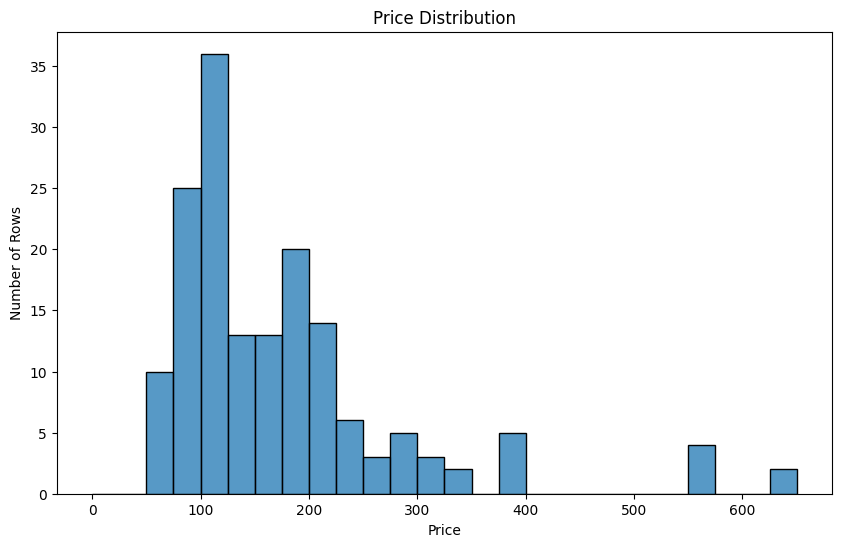

In [472]:
plt.figure(figsize=(10, 6))
sns.histplot(main_df['price2'], bins=range(0, max(main_df['price2']) + 25, 25))
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of Rows')

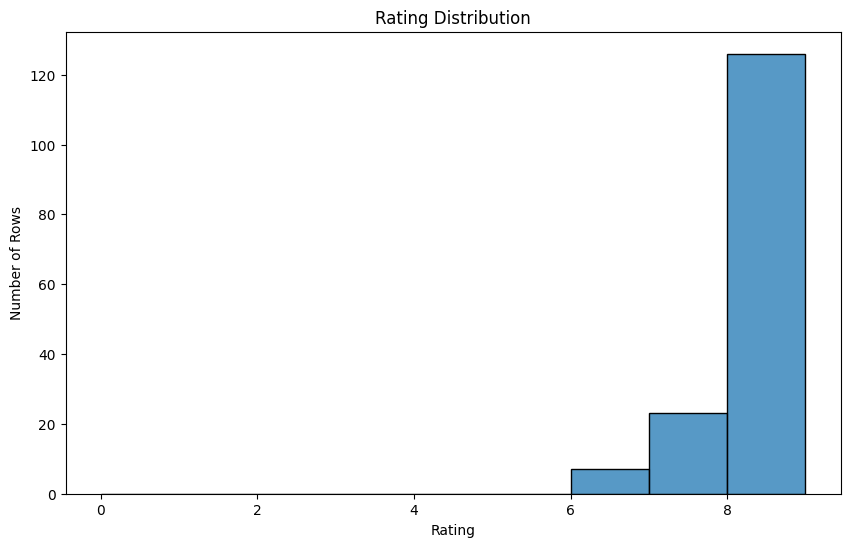

In [473]:
plt.figure(figsize=(10, 6))
sns.histplot(main_df['rating'], bins=range(0, 10))
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Rows')

plt.show()

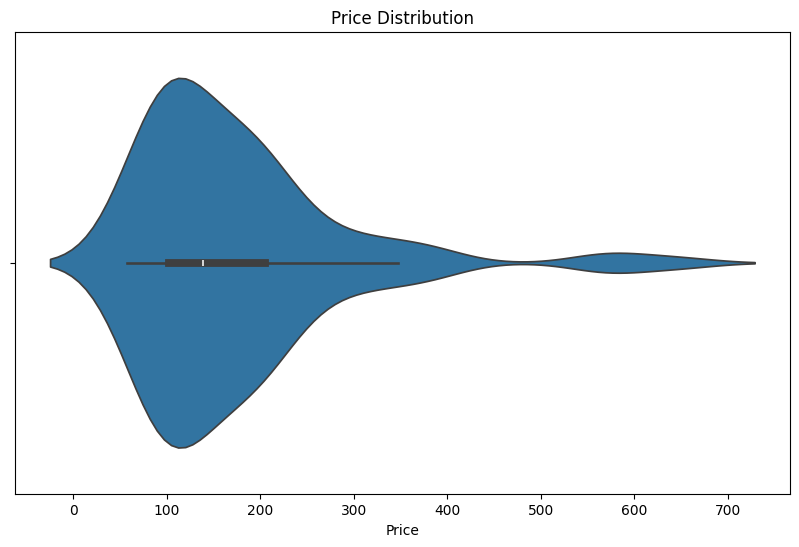

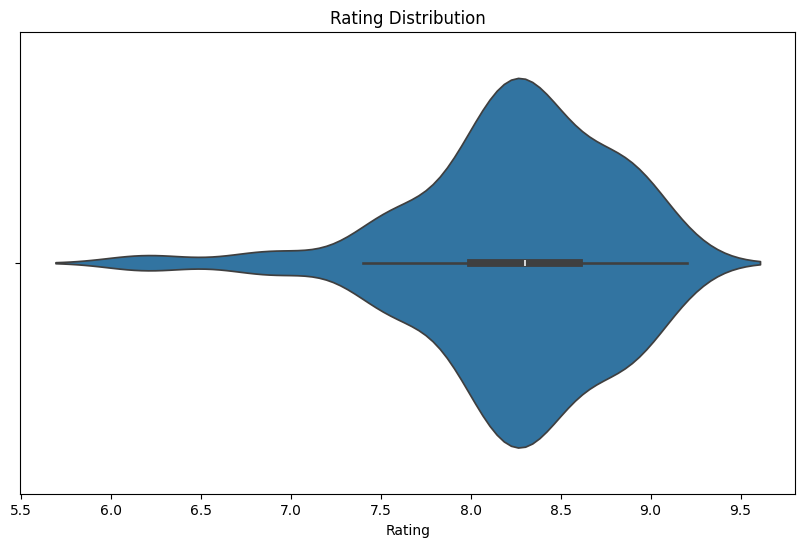

In [474]:
# Create a violin plot for price
plt.figure(figsize=(10, 6))
sns.violinplot(data=main_df, x='price2')
plt.title('Price Distribution')
plt.xlabel('Price')

plt.show()

# Create a violin plot for rating
plt.figure(figsize=(10, 6))
sns.violinplot(data=main_df, x='rating')
plt.title('Rating Distribution')
plt.xlabel('Rating')

plt.show()

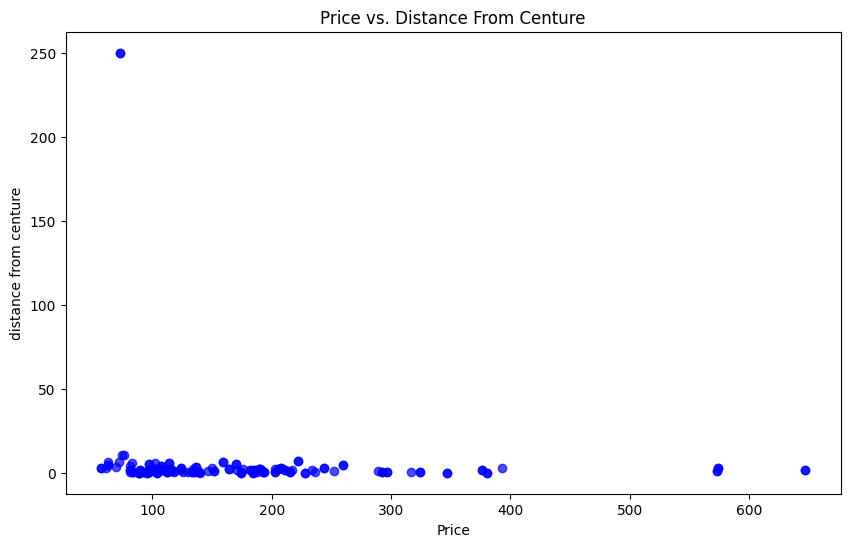

In [475]:
distance_from_centure_less_than_50 = main_df[main_df['dfc']<50]
plt.figure(figsize=(10, 6))
plt.scatter(main_df['price2'], main_df['dfc'], color='blue', alpha=0.7)
plt.title('Price vs. Distance From Centure')
plt.xlabel('Price')
plt.ylabel('distance from centure')

plt.show()


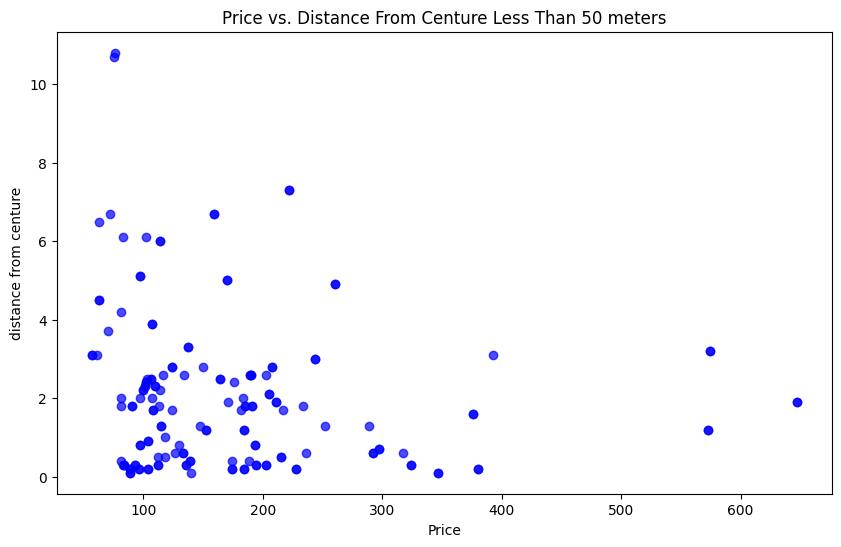

In [476]:
distance_from_centure_less_than_50 = main_df[main_df['dfc']<50]
plt.figure(figsize=(10, 6))
plt.scatter(distance_from_centure_less_than_50['price2'], distance_from_centure_less_than_50['dfc'], color='blue', alpha=0.7)
plt.title('Price vs. Distance From Centure Less Than 50 meters')
plt.xlabel('Price')
plt.ylabel('distance from centure')

plt.show()


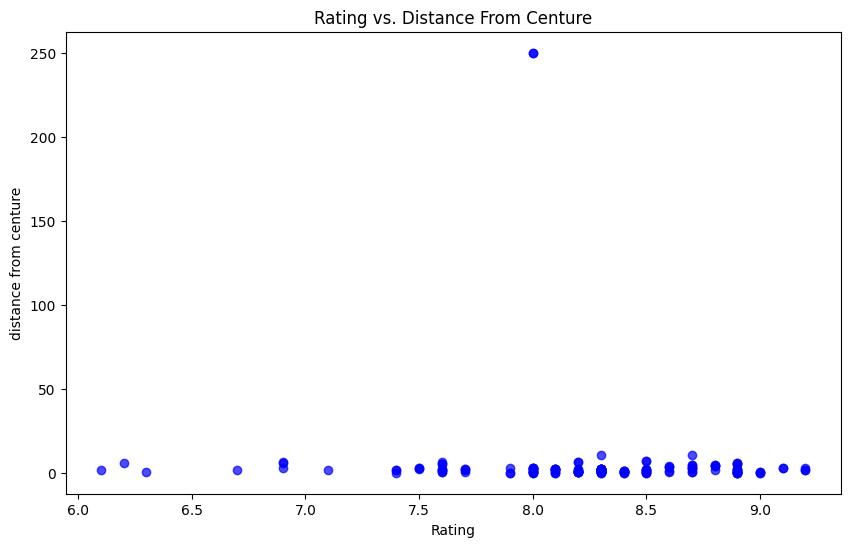

In [477]:
plt.figure(figsize=(10, 6))
plt.scatter(main_df['rating'], main_df['dfc'], color='blue', alpha=0.7)
plt.title('Rating vs. Distance From Centure')
plt.xlabel('Rating')
plt.ylabel('distance from centure')

plt.show()


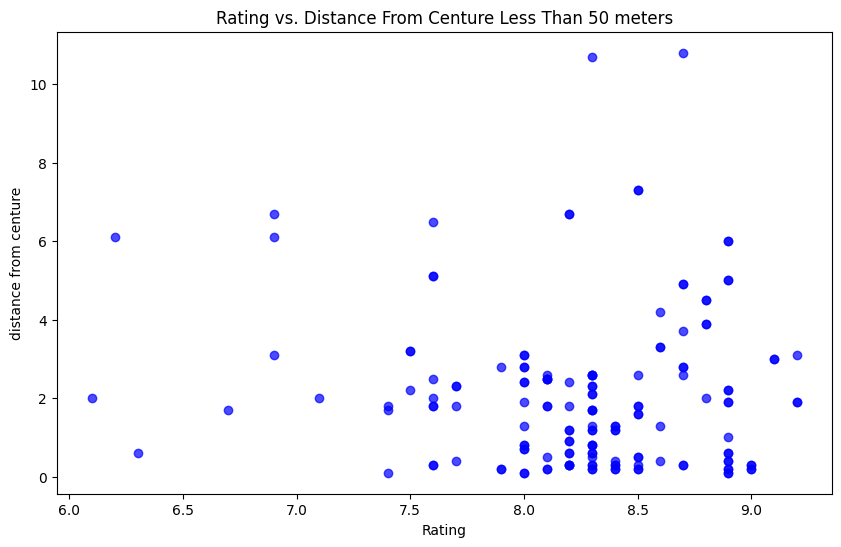

In [478]:
# distance_from_centure_less_than_50 = main_df[main_df['dfc']<50]
plt.figure(figsize=(10, 6))
plt.scatter(distance_from_centure_less_than_50['rating'], distance_from_centure_less_than_50['dfc'], color='blue', alpha=0.7)
plt.title('Rating vs. Distance From Centure Less Than 50 meters')
plt.xlabel('Rating')
plt.ylabel('distance from centure')

plt.show()


In [479]:
main_df

,name,rating,quality,room_type,city,neighbourhood,quality_val,nights2,adults2,review2,price2,bed2,dfc
123,Le Narcisse Blanc,9.2,Superb,Classic Double Room,Paris,7th arr.,4,1,2,577,647,1.0,1.9
124,Atala powered by Sonder,8.1,Very good,King Room,Paris,8th arr.,2,1,2,1251,164,1.0,2.5
125,Melia Paris Champs Elysées,7.5,Good,Junior Suite,Paris,16th arr.,1,1,2,357,574,1.0,3.2
126,Le Relais du Marais,8.0,Very good,Double or Twin Room,Paris,3rd arr.,2,1,2,1694,193,1.0,0.8
127,Hôtel Tilde,7.7,Good,Small Double Room,Paris,19th arr.,1,1,2,3302,110,1.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,Jc Rooms Jardines,8.3,Very good,Deluxe Double or Twin Room,Madrid,Centro,2,1,2,4463,104,1.0,0.2
594,Suite Prado,8.5,Very good,One-Bedroom Apartment,Madrid,Centro,2,1,2,1120,184,1.0,0.2
595,Catalonia Puerta del Sol,9.0,Superb,Double or Twin Room,Madrid,Centro,4,1,2,2595,228,1.0,0.2
596,Hotel Pinar Plaza,8.7,Fabulous,Standard Double Room,Madrid,Ciudad Lineal,3,1,2,423,260,1.0,4.9


In [480]:
main_df['room_type'].unique()

array(['Classic Double Room', 'King Room', 'Junior Suite',
       'Double or Twin Room', 'Small Double Room', 'Standard Double Room',
       'Double Room', 'Classic Room', 'Comfort Double Room',
       'Superior Apartment', 'Small Double Room - Riviera',
       'Business Double Room', 'Superior Room',
       'Large Double or Twin Room', 'Deluxe Double Room',
       'Superior Studio', 'Studio with Garden View',
       'Deluxe Room, Guest room, 1 Queen', 'Double Room with Garden View',
       'Deluxe Studio', 'One-Bedroom Apartment',
       'Three-Bedroom Apartment', 'Standard King Room', 'King Studio',
       'Large Double Room with Shared Bathroom',
       'Double Room (Without Window)',
       'Z Inside Double (without a window)', 'Double Room without Window',
       'Queen Room - Mobility Access',
       'Superior Double Room with Internal View', 'Superior King Room',
       'Studio', 'Standard Double or Twin Room', 'Comfort Room',
       'Comfort Twin Room', 'Twin Room', 'Urban Prem

C:\Users\User\AppData\Local\Temp\ipykernel_19052\2945381888.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=main_df, x='bed2', y='review2', palette='viridis')


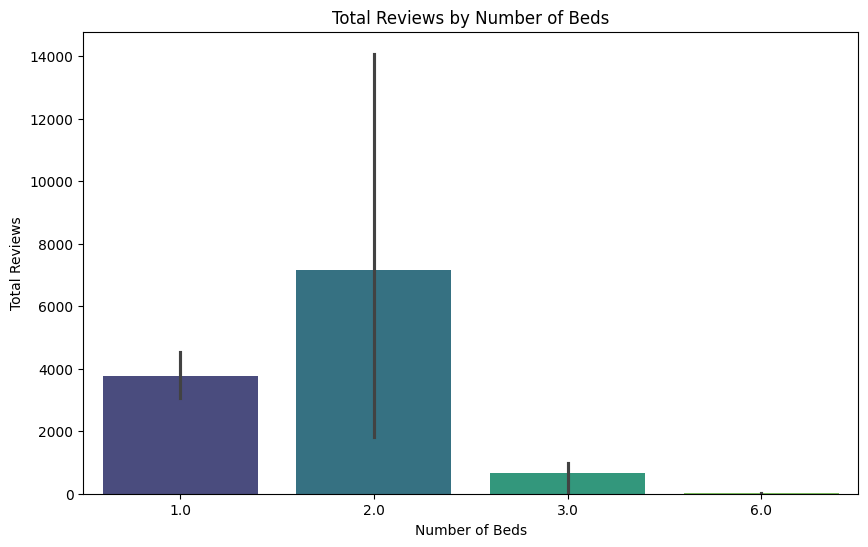

In [481]:
# aggregated_df = main_df.groupby('beds2').agg({'reviews': 'sum'}).reset_index()

# Create a bar plot for reviews and number of beds
plt.figure(figsize=(10, 6))
sns.barplot(data=main_df, x='bed2', y='review2', palette='viridis')
plt.title('Total Reviews by Number of Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Total Reviews')

plt.show()